In [29]:
import sounddevice as sd
from scipy.io.wavfile import write, read
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
duration = 5  # seconds
fs = 44100    # sample rate (Hz)

print("Recording...")
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait() 
print("Done!")

# Save to WAV file
# write("test_1.wav", fs, audio)

Recording...
Done!


In [22]:
# Load WAV file
fs, test_1 = read("test_1.wav") 
fs, noise_1 = read("noise_1.wav")

In [27]:
# Play audio
sd.play(test_1, fs)
sd.wait()  

Text(0.5, 0, 'Time')

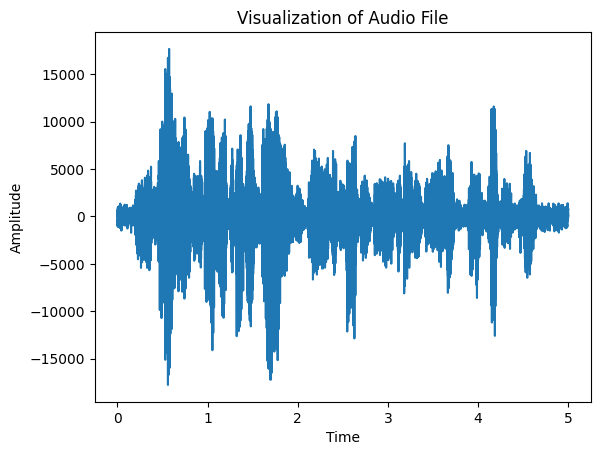

In [30]:
t = np.linspace(0.0, 5.0, test_1.shape[0])
plt.plot(t, test_1)
plt.title("Visualization of Audio File")
plt.ylabel("Amplitude")
plt.xlabel("Time")

Text(0.5, 1.0, 'Amplitude vs Frequency of Noise_1')

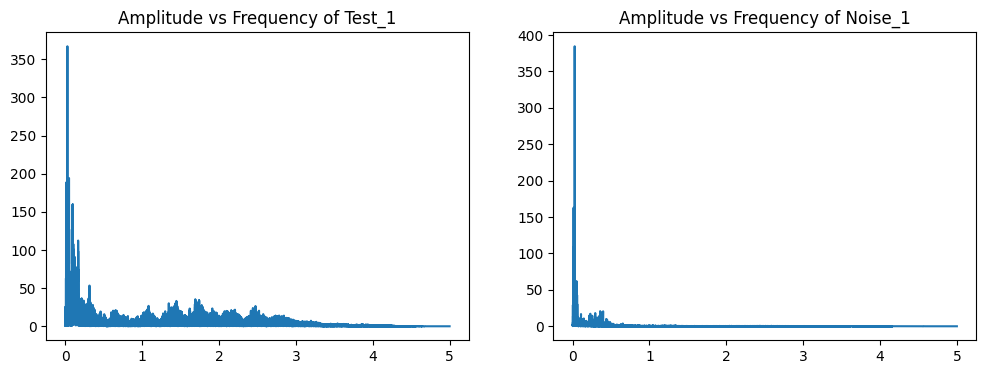

In [47]:
fs, test_1 = read("test_1.wav") 
_, noise_1 = read("noise_1.wav")
assert fs == _
N = test_1.shape[0]

test_1f = fft(test_1)
noise_1f = fft(noise_1)

test_1f = test_1f[:N//2]
noise_1f = noise_1f[:N//2]

duration = N / fs
t = np.linspace(0.0, duration, N // 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(t, (2 / N) * abs(test_1f))
axs[0].set_title("Amplitude vs Frequency of Test_1")
axs[1].plot(t, (2 / N) * abs(noise_1f))
axs[1].set_title("Amplitude vs Frequency of Noise_1")

In [55]:
fs, test_1 = read("test_1.wav") 
_, noise_1 = read("noise_1.wav")

test_1f = fft(test_1)
noise_1f = fft(noise_1)
test_1f -= noise_1f
test_2 = np.real(ifft(test_1f))

test_2 = test_2 / np.max(np.abs(test_2))  # Normalize
test_2 = test_2.astype(np.float32)


sd.play(test_2, fs)
sd.wait()

KeyboardInterrupt: 